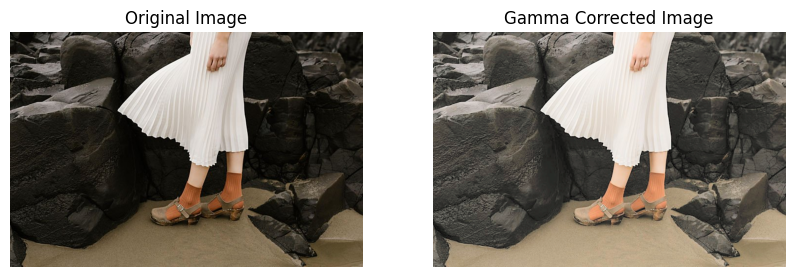

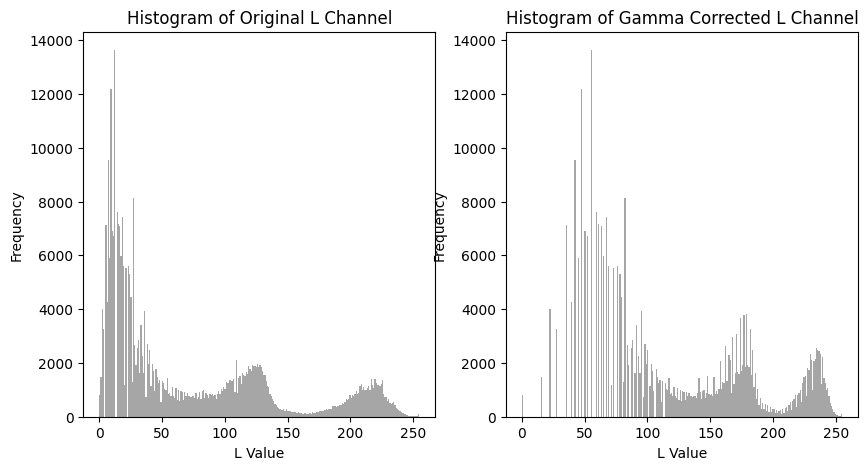

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the specified path
image_path = r"E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/highlights_and_shadows.jpg"
image = cv2.imread(image_path)

# Verify if the image was successfully loaded
if image is None:
    print("Error: Unable to load the image. Please check the file path.")
else:
    # Convert the image to the LAB color space
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    # Split the LAB image into its three channels
    L_channel, a_channel, b_channel = cv2.split(image_lab)

    # Function to perform gamma correction
    def apply_gamma_correction(image, gamma_value=1.0):
        lookup_table = np.array([((i / 255.0) ** gamma_value) * 255 for i in range(256)]).astype("uint8")
        return cv2.LUT(image, lookup_table)

    # Perform gamma correction with a gamma value of 0.5
    corrected_L_channel = apply_gamma_correction(L_channel, gamma_value=0.5)

    # Merge the modified L channel back with the original a and b channels
    lab_corrected_image = cv2.merge([corrected_L_channel, a_channel, b_channel])
    final_corrected_image = cv2.cvtColor(lab_corrected_image, cv2.COLOR_Lab2BGR)

    # Convert the original and corrected images to RGB for display
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    corrected_image_rgb = cv2.cvtColor(final_corrected_image, cv2.COLOR_BGR2RGB)

    # Display the original and gamma-corrected images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(corrected_image_rgb)
    plt.title('Gamma Corrected Image')
    plt.axis('off')
    plt.show()

    # Plot the histograms for the L channel before and after correction
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(L_channel.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title('Histogram of Original L Channel')
    plt.xlabel('L Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(corrected_L_channel.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title('Histogram of Gamma Corrected L Channel')
    plt.xlabel('L Value')
    plt.ylabel('Frequency')
    plt.show()
